# BigMart Sales Prediction - Complete ML Pipeline

**Objective:** Predict sales of products at BigMart outlets using various machine learning models

**Evaluation Metric:** RMSE (Root Mean Square Error)

## Table of Contents
1. Data Loading and Initial Exploration
2. Exploratory Data Analysis (EDA)
3. Data Cleaning and Missing Value Treatment
4. Feature Engineering
5. Data Preprocessing
6. Model Building and Evaluation
   - Linear Regression
   - Ridge Regression
   - Lasso Regression
   - Decision Tree
   - Random Forest
   - Gradient Boosting
   - XGBoost
   - LightGBM
7. Hyperparameter Tuning
8. Final Predictions and Submission Files

## 1. Import Libraries and Load Data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('ggplot')

print("All libraries imported successfully!")

All libraries imported successfully!


In [2]:
# Load datasets
train = pd.read_csv('train_v9rqX0R.csv')
test = pd.read_csv('test_AbJTz2l.csv')
submission = pd.read_csv('sample_submission_8RXa3c6.csv')

print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("\nData loaded successfully!")

Train shape: (8523, 12)
Test shape: (5681, 11)

Data loaded successfully!


## 2. Exploratory Data Analysis (EDA)

In [3]:
# Display first few rows
print("=" * 80)
print("TRAINING DATA - FIRST 5 ROWS")
print("=" * 80)
train.head()

TRAINING DATA - FIRST 5 ROWS


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# Data info
print("=" * 80)
print("TRAINING DATA - INFO")
print("=" * 80)
train.info()

TRAINING DATA - INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# Statistical summary
print("=" * 80)
print("STATISTICAL SUMMARY")
print("=" * 80)
train.describe()

STATISTICAL SUMMARY


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
# Check for missing values
print("=" * 80)
print("MISSING VALUES IN TRAINING DATA")
print("=" * 80)
missing_train = train.isnull().sum()
missing_train_pct = (train.isnull().sum() / len(train)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_train,
    'Percentage': missing_train_pct
})
print(missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False))

print("\n" + "=" * 80)
print("MISSING VALUES IN TEST DATA")
print("=" * 80)
missing_test = test.isnull().sum()
missing_test_pct = (test.isnull().sum() / len(test)) * 100
missing_test_df = pd.DataFrame({
    'Missing_Count': missing_test,
    'Percentage': missing_test_pct
})
print(missing_test_df[missing_test_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False))

MISSING VALUES IN TRAINING DATA
             Missing_Count  Percentage
Outlet_Size           2410   28.276428
Item_Weight           1463   17.165317

MISSING VALUES IN TEST DATA
             Missing_Count  Percentage
Outlet_Size           1606   28.269671
Item_Weight            976   17.180074


In [7]:
# Check unique values in categorical columns
print("=" * 80)
print("UNIQUE VALUES IN CATEGORICAL COLUMNS")
print("=" * 80)
categorical_cols = train.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}: {train[col].nunique()} unique values")
    print(train[col].value_counts())

UNIQUE VALUES IN CATEGORICAL COLUMNS

Item_Identifier: 1559 unique values
Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

Item_Fat_Content: 5 unique values
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Item_Type: 16 unique values
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

Outlet_Identifier: 10 unique value

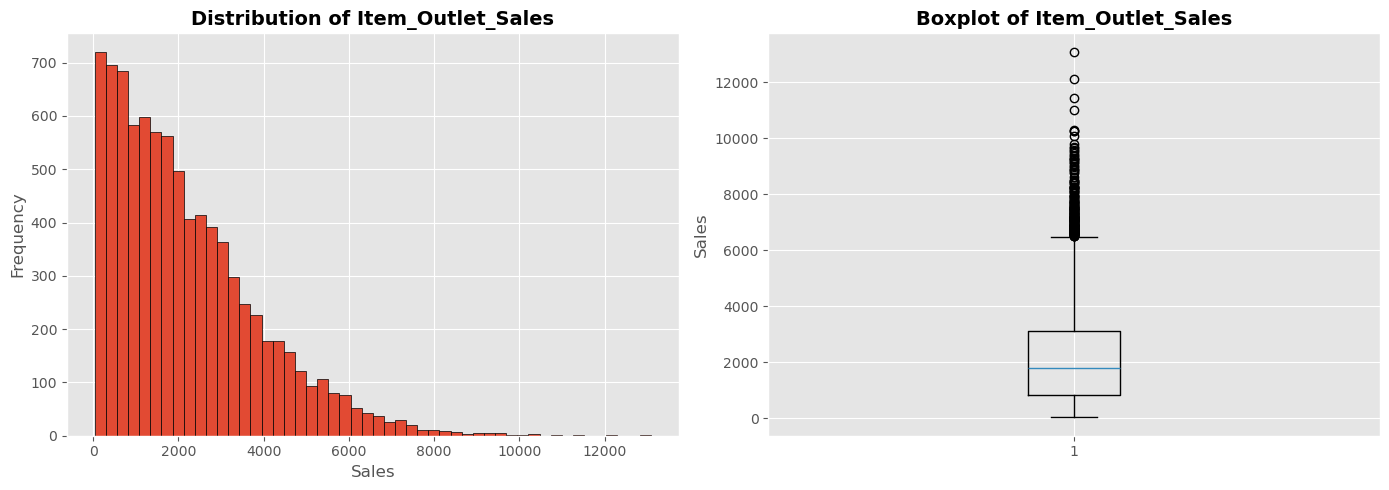

Target Variable Statistics:
Mean: 2181.29
Median: 1794.33
Std Dev: 1706.50
Skewness: 1.18


In [8]:
# Visualize target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(train['Item_Outlet_Sales'], bins=50, edgecolor='black')
axes[0].set_title('Distribution of Item_Outlet_Sales', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sales')
axes[0].set_ylabel('Frequency')

# Box plot
axes[1].boxplot(train['Item_Outlet_Sales'])
axes[1].set_title('Boxplot of Item_Outlet_Sales', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Sales')

plt.tight_layout()
plt.show()

print(f"Target Variable Statistics:")
print(f"Mean: {train['Item_Outlet_Sales'].mean():.2f}")
print(f"Median: {train['Item_Outlet_Sales'].median():.2f}")
print(f"Std Dev: {train['Item_Outlet_Sales'].std():.2f}")
print(f"Skewness: {train['Item_Outlet_Sales'].skew():.2f}")

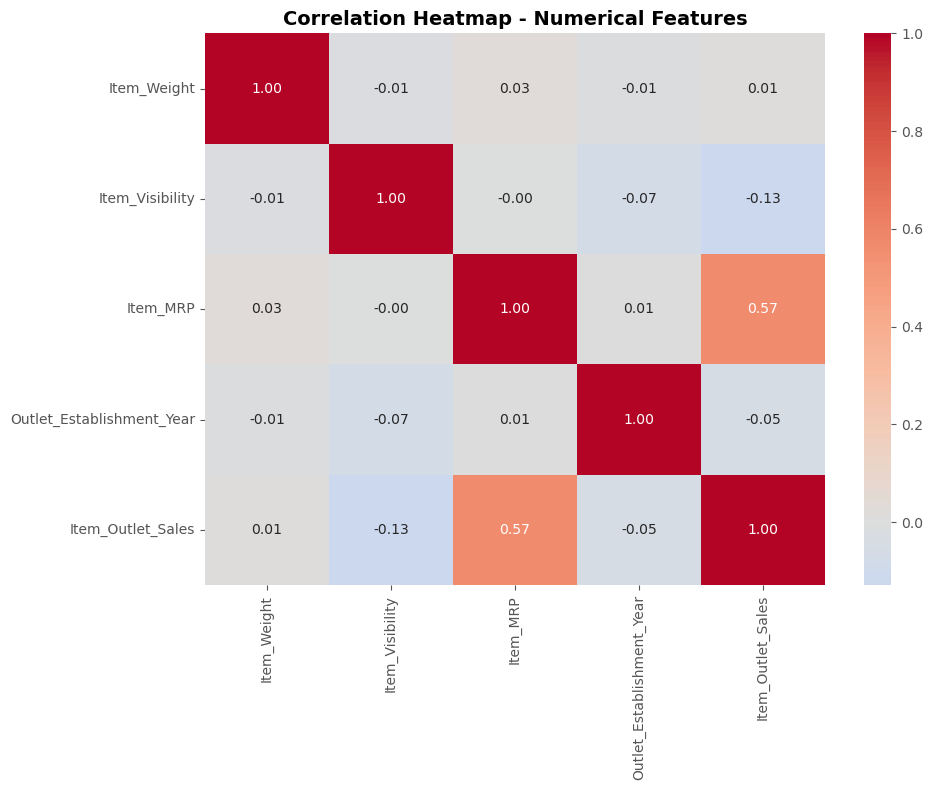

In [9]:
# Correlation heatmap for numerical features
numerical_cols = train.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(train[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap - Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

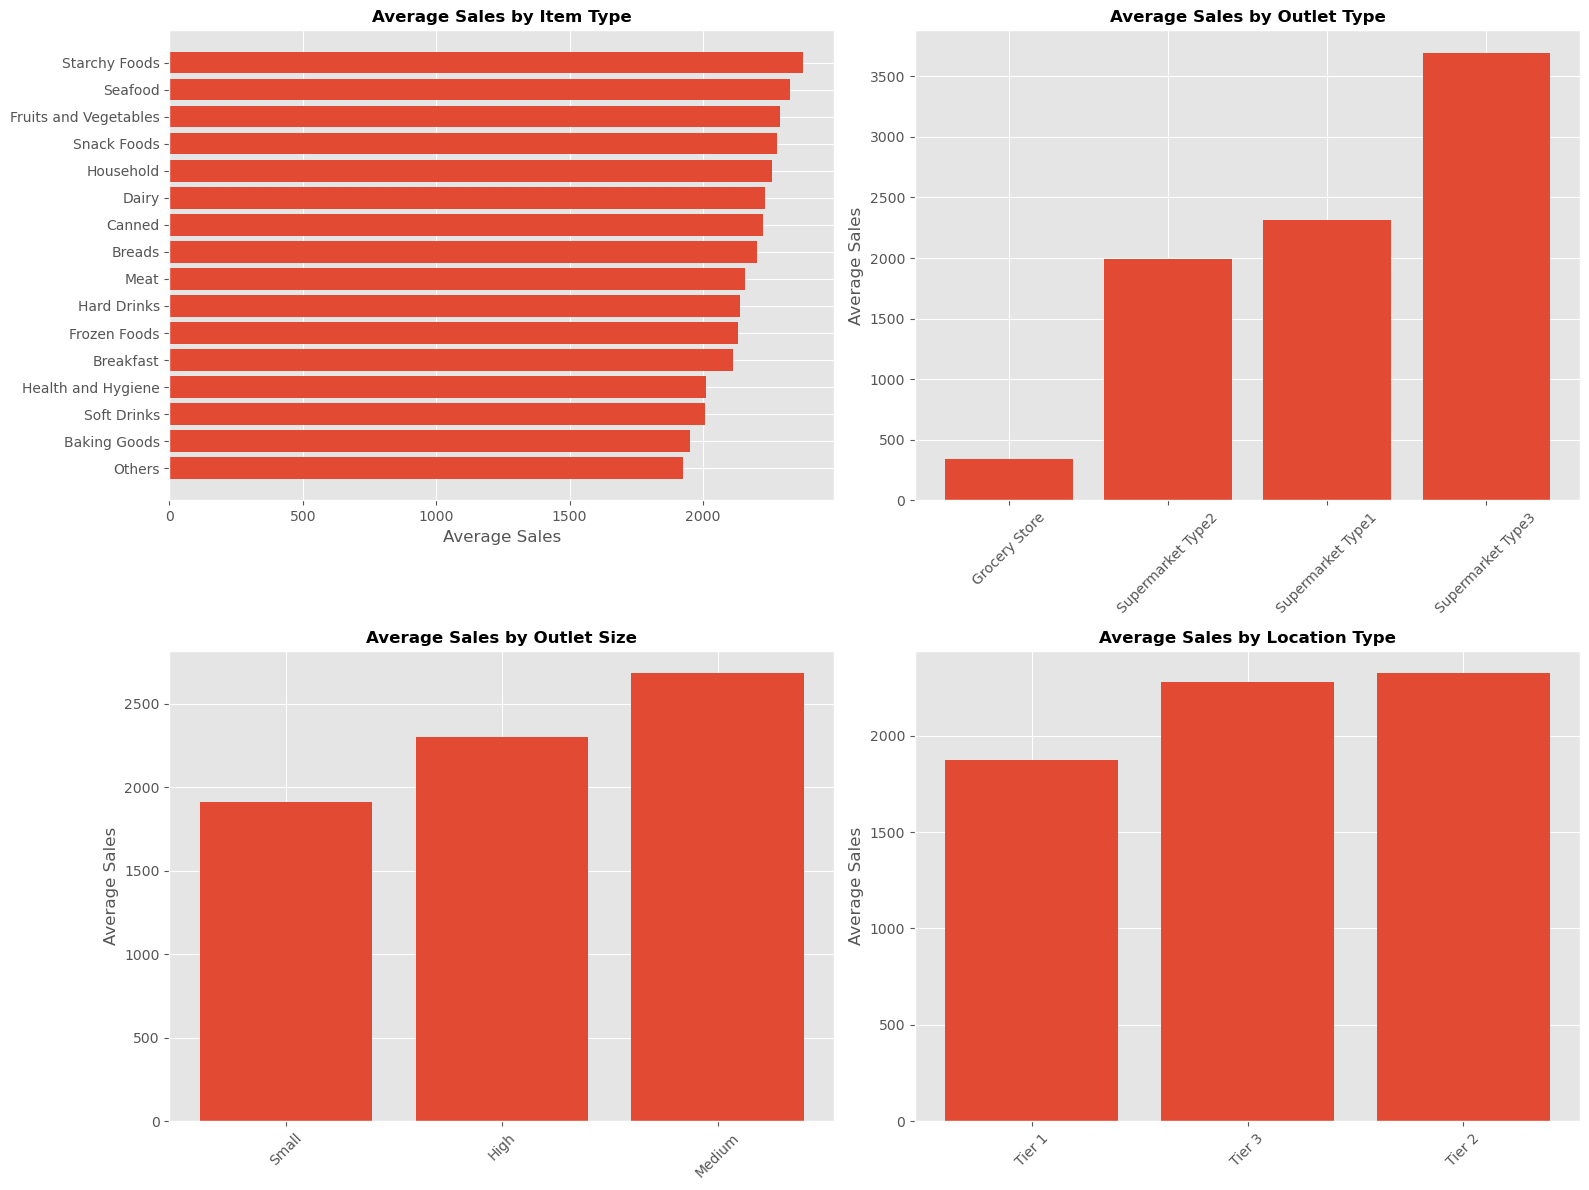

In [10]:
# Visualize sales by categorical features
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Sales by Item_Type
item_type_sales = train.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values()
axes[0, 0].barh(item_type_sales.index, item_type_sales.values)
axes[0, 0].set_title('Average Sales by Item Type', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Average Sales')

# Sales by Outlet_Type
outlet_type_sales = train.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values()
axes[0, 1].bar(range(len(outlet_type_sales)), outlet_type_sales.values)
axes[0, 1].set_xticks(range(len(outlet_type_sales)))
axes[0, 1].set_xticklabels(outlet_type_sales.index, rotation=45)
axes[0, 1].set_title('Average Sales by Outlet Type', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Average Sales')

# Sales by Outlet_Size
outlet_size_sales = train.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().sort_values()
axes[1, 0].bar(range(len(outlet_size_sales)), outlet_size_sales.values)
axes[1, 0].set_xticks(range(len(outlet_size_sales)))
axes[1, 0].set_xticklabels(outlet_size_sales.index, rotation=45)
axes[1, 0].set_title('Average Sales by Outlet Size', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Average Sales')

# Sales by Outlet_Location_Type
location_sales = train.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().sort_values()
axes[1, 1].bar(range(len(location_sales)), location_sales.values)
axes[1, 1].set_xticks(range(len(location_sales)))
axes[1, 1].set_xticklabels(location_sales.index, rotation=45)
axes[1, 1].set_title('Average Sales by Location Type', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Average Sales')

plt.tight_layout()
plt.show()

## 3. Data Cleaning and Missing Value Treatment

In [11]:
# Create a combined dataset for consistent preprocessing
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], ignore_index=True)

print(f"Combined dataset shape: {data.shape}")
print(f"Train records: {len(train)}")
print(f"Test records: {len(test)}")

Combined dataset shape: (14204, 13)
Train records: 8523
Test records: 5681


In [12]:
# 3.1 Handle Item_Weight missing values
# Strategy: Fill missing weights with the average weight of the same Item_Identifier
print("Handling Item_Weight missing values...")
print(f"Missing before: {data['Item_Weight'].isnull().sum()}")

item_weight_avg = data.groupby('Item_Identifier')['Item_Weight'].transform('mean')
data['Item_Weight'].fillna(item_weight_avg, inplace=True)

print(f"Missing after: {data['Item_Weight'].isnull().sum()}")

Handling Item_Weight missing values...
Missing before: 2439
Missing after: 0


In [13]:
# 3.2 Handle Outlet_Size missing values
# Strategy: Fill based on the mode of Outlet_Size for each Outlet_Type
print("\nHandling Outlet_Size missing values...")
print(f"Missing before: {data['Outlet_Size'].isnull().sum()}")

# First, check the relationship between Outlet_Type and Outlet_Size
print("\nOutlet_Size by Outlet_Type:")
print(pd.crosstab(data['Outlet_Type'], data['Outlet_Size'], margins=True))

# Fill missing values based on Outlet_Type mode
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=lambda x: x.mode()[0] if not x.mode().empty else 'Medium')
print("\nMode of Outlet_Size for each Outlet_Type:")
print(outlet_size_mode)

# For Grocery Store, fill with Small (most logical)
data.loc[(data['Outlet_Size'].isnull()) & (data['Outlet_Type'] == 'Grocery Store'), 'Outlet_Size'] = 'Small'
# For Supermarket Type1, fill with Small (mode)
data.loc[(data['Outlet_Size'].isnull()) & (data['Outlet_Type'] == 'Supermarket Type1'), 'Outlet_Size'] = 'Small'

print(f"Missing after: {data['Outlet_Size'].isnull().sum()}")


Handling Outlet_Size missing values...
Missing before: 4016

Outlet_Size by Outlet_Type:
Outlet_Size        High  Medium  Small    All
Outlet_Type                                  
Grocery Store         0       0    880    880
Supermarket Type1  1553    1550   3100   6203
Supermarket Type2     0    1546      0   1546
Supermarket Type3     0    1559      0   1559
All                1553    4655   3980  10188

Mode of Outlet_Size for each Outlet_Type:
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  
Missing after: 0


In [14]:
# 3.3 Handle Item_Fat_Content inconsistencies
print("\nHandling Item_Fat_Content inconsistencies...")
print("Before cleaning:")
print(data['Item_Fat_Content'].value_counts())

# Standardize the values
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})

print("\nAfter cleaning:")
print(data['Item_Fat_Content'].value_counts())


Handling Item_Fat_Content inconsistencies...
Before cleaning:
Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64

After cleaning:
Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64


In [15]:
# 3.4 Handle Item_Visibility = 0 (which is not possible)
print("\nHandling Item_Visibility = 0...")
print(f"Zero visibility count: {(data['Item_Visibility'] == 0).sum()}")

# Replace 0 with mean visibility of that Item_Identifier
visibility_avg = data[data['Item_Visibility'] != 0].groupby('Item_Identifier')['Item_Visibility'].mean()
data['Item_Visibility'] = data.apply(
    lambda x: visibility_avg[x['Item_Identifier']] if x['Item_Visibility'] == 0 else x['Item_Visibility'],
    axis=1
)

print(f"Zero visibility count after: {(data['Item_Visibility'] == 0).sum()}")


Handling Item_Visibility = 0...
Zero visibility count: 879
Zero visibility count after: 0


In [16]:
# 3.5 Fix Item_Fat_Content for non-consumable items
# Non-consumable items should not have fat content
print("\nFixing Item_Fat_Content for non-consumable items...")
non_consumable = ['Health and Hygiene', 'Household', 'Others']
data.loc[data['Item_Type'].isin(non_consumable), 'Item_Fat_Content'] = 'Non-Edible'

print("Updated Item_Fat_Content distribution:")
print(data['Item_Fat_Content'].value_counts())


Fixing Item_Fat_Content for non-consumable items...
Updated Item_Fat_Content distribution:
Item_Fat_Content
Low Fat       6499
Regular       5019
Non-Edible    2686
Name: count, dtype: int64


## 4. Feature Engineering

In [17]:
# 4.1 Extract features from Item_Identifier
print("Creating new features from Item_Identifier...")
# Extract item category from Item_Identifier (first 2 letters)
data['Item_Category'] = data['Item_Identifier'].str[:2]
print("Item_Category distribution:")
print(data['Item_Category'].value_counts())

Creating new features from Item_Identifier...
Item_Category distribution:
Item_Category
FD    10201
NC     2686
DR     1317
Name: count, dtype: int64


In [18]:
# 4.2 Create Outlet Age feature
print("\nCreating Outlet Age feature...")
data['Outlet_Age'] = 2013 - data['Outlet_Establishment_Year']
print(f"Outlet Age range: {data['Outlet_Age'].min()} to {data['Outlet_Age'].max()} years")


Creating Outlet Age feature...
Outlet Age range: 4 to 28 years


In [19]:
# 4.3 Create Item_MRP categories (binning)
print("\nCreating Item_MRP categories...")
data['Item_MRP_Category'] = pd.cut(data['Item_MRP'], bins=[0, 69, 136, 203, 270], 
                                     labels=['Low', 'Medium', 'High', 'Very_High'])
print("Item_MRP_Category distribution:")
print(data['Item_MRP_Category'].value_counts())


Creating Item_MRP categories...
Item_MRP_Category distribution:
Item_MRP_Category
High         4935
Medium       4661
Very_High    2400
Low          2208
Name: count, dtype: int64


In [20]:
# 4.4 Create visibility ratio feature
# Item visibility compared to mean visibility of that item type
print("\nCreating Item_Visibility_Ratio feature...")
item_type_visibility_mean = data.groupby('Item_Type')['Item_Visibility'].transform('mean')
data['Item_Visibility_Ratio'] = data['Item_Visibility'] / item_type_visibility_mean
print(f"Item_Visibility_Ratio statistics:")
print(data['Item_Visibility_Ratio'].describe())


Creating Item_Visibility_Ratio feature...
Item_Visibility_Ratio statistics:
count    14204.000000
mean         1.000000
std          0.711489
min          0.050320
25%          0.453554
50%          0.815888
75%          1.396395
max          5.180005
Name: Item_Visibility_Ratio, dtype: float64


In [21]:
# 4.5 Simplify Item_Type into broader categories
print("\nCreating Item_Type_Combined feature...")
data['Item_Type_Combined'] = data['Item_Type'].replace({
    'Soft Drinks': 'Drinks',
    'Hard Drinks': 'Drinks',
    'Fruits and Vegetables': 'Food',
    'Snack Foods': 'Food',
    'Breakfast': 'Food',
    'Frozen Foods': 'Food',
    'Meat': 'Food',
    'Seafood': 'Food',
    'Dairy': 'Food',
    'Baking Goods': 'Food',
    'Canned': 'Food',
    'Health and Hygiene': 'Non-Consumable',
    'Household': 'Non-Consumable',
    'Others': 'Non-Consumable',
    'Breads': 'Food',
    'Starchy Foods': 'Food'
})
print("Item_Type_Combined distribution:")
print(data['Item_Type_Combined'].value_counts())


Creating Item_Type_Combined feature...
Item_Type_Combined distribution:
Item_Type_Combined
Food              10430
Non-Consumable     2686
Drinks             1088
Name: count, dtype: int64


In [22]:
# 4.6 Create outlet-item interaction features
print("\nCreating interaction features...")
# Average sales per outlet
outlet_sales_mean = train.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().to_dict()
data['Outlet_Sales_Mean'] = data['Outlet_Identifier'].map(outlet_sales_mean)
data['Outlet_Sales_Mean'].fillna(data['Outlet_Sales_Mean'].mean(), inplace=True)

# Average sales per item type
item_type_sales_mean = train.groupby('Item_Type')['Item_Outlet_Sales'].mean().to_dict()
data['Item_Type_Sales_Mean'] = data['Item_Type'].map(item_type_sales_mean)
data['Item_Type_Sales_Mean'].fillna(data['Item_Type_Sales_Mean'].mean(), inplace=True)

print("Interaction features created successfully!")


Creating interaction features...
Interaction features created successfully!


In [23]:
# Display all new features
print("\n" + "=" * 80)
print("ALL FEATURES AFTER ENGINEERING")
print("=" * 80)
print(data.columns.tolist())
print(f"\nTotal features: {len(data.columns)}")


ALL FEATURES AFTER ENGINEERING
['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales', 'source', 'Item_Category', 'Outlet_Age', 'Item_MRP_Category', 'Item_Visibility_Ratio', 'Item_Type_Combined', 'Outlet_Sales_Mean', 'Item_Type_Sales_Mean']

Total features: 20


## 5. Data Preprocessing

In [24]:
# 5.1 Label Encoding for categorical variables
print("Encoding categorical variables...")

# Create label encoders
label_encoders = {}
categorical_features = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
                        'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Category',
                        'Item_MRP_Category', 'Item_Type_Combined']

for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le
    
print(f"Encoded {len(categorical_features)} categorical features")

Encoding categorical variables...
Encoded 10 categorical features


In [25]:
# 5.2 Split data back into train and test
train_processed = data[data['source'] == 'train'].copy()
test_processed = data[data['source'] == 'test'].copy()

# Drop unnecessary columns
cols_to_drop = ['source', 'Outlet_Establishment_Year']
train_processed.drop(cols_to_drop, axis=1, inplace=True)
test_processed.drop(cols_to_drop + ['Item_Outlet_Sales'], axis=1, inplace=True)

print(f"Train shape after processing: {train_processed.shape}")
print(f"Test shape after processing: {test_processed.shape}")

Train shape after processing: (8523, 18)
Test shape after processing: (5681, 17)


In [26]:
# 5.3 Prepare X and y for training
X = train_processed.drop(['Item_Outlet_Sales'], axis=1)
y = train_processed['Item_Outlet_Sales']
X_test = test_processed.copy()

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"X_test shape: {X_test.shape}")

# Split training data for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nX_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")

X shape: (8523, 17)
y shape: (8523,)
X_test shape: (5681, 17)

X_train shape: (6818, 17)
X_val shape: (1705, 17)


## 6. Model Building and Evaluation

In [27]:
# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_val, y_val, model_name):
    """
    Train and evaluate a model
    """
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    
    # Print results
    print("=" * 80)
    print(f"{model_name} PERFORMANCE")
    print("=" * 80)
    print(f"Training RMSE:   {train_rmse:.4f}")
    print(f"Validation RMSE: {val_rmse:.4f}")
    print(f"Training R2:     {train_r2:.4f}")
    print(f"Validation R2:   {val_r2:.4f}")
    print(f"Training MAE:    {train_mae:.4f}")
    print(f"Validation MAE:  {val_mae:.4f}")
    print("=" * 80)
    print()
    
    return {
        'model': model,
        'model_name': model_name,
        'train_rmse': train_rmse,
        'val_rmse': val_rmse,
        'train_r2': train_r2,
        'val_r2': val_r2,
        'train_mae': train_mae,
        'val_mae': val_mae
    }

# Dictionary to store all model results
model_results = {}

In [28]:
# 6.1 Linear Regression
print("Training Linear Regression...\n")
lr_model = LinearRegression()
model_results['Linear_Regression'] = evaluate_model(lr_model, X_train, y_train, X_val, y_val, "Linear Regression")

Training Linear Regression...

Linear Regression PERFORMANCE
Training RMSE:   1142.2989
Validation RMSE: 1067.2640
Training R2:     0.5589
Validation R2:   0.5809
Training MAE:    848.4763
Validation MAE:  791.1414



In [29]:
# 6.2 Ridge Regression
print("Training Ridge Regression...\n")
ridge_model = Ridge(alpha=1.0, random_state=42)
model_results['Ridge_Regression'] = evaluate_model(ridge_model, X_train, y_train, X_val, y_val, "Ridge Regression")

Training Ridge Regression...

Ridge Regression PERFORMANCE
Training RMSE:   1142.3088
Validation RMSE: 1067.2512
Training R2:     0.5589
Validation R2:   0.5809
Training MAE:    848.5166
Validation MAE:  791.2188



In [30]:
# 6.3 Lasso Regression
print("Training Lasso Regression...\n")
lasso_model = Lasso(alpha=1.0, random_state=42)
model_results['Lasso_Regression'] = evaluate_model(lasso_model, X_train, y_train, X_val, y_val, "Lasso Regression")

Training Lasso Regression...

Lasso Regression PERFORMANCE
Training RMSE:   1142.3450
Validation RMSE: 1066.7151
Training R2:     0.5588
Validation R2:   0.5813
Training MAE:    848.3360
Validation MAE:  790.8235



In [31]:
# 6.4 Decision Tree Regressor
print("Training Decision Tree Regressor...\n")
dt_model = DecisionTreeRegressor(max_depth=15, min_samples_split=50, min_samples_leaf=20, random_state=42)
model_results['Decision_Tree'] = evaluate_model(dt_model, X_train, y_train, X_val, y_val, "Decision Tree")

Training Decision Tree Regressor...

Decision Tree PERFORMANCE
Training RMSE:   1000.5276
Validation RMSE: 1098.0832
Training R2:     0.6616
Validation R2:   0.5564
Training MAE:    694.8909
Validation MAE:  757.5702



In [32]:
# 6.5 Random Forest Regressor
print("Training Random Forest Regressor...\n")
rf_model = RandomForestRegressor(n_estimators=200, max_depth=15, min_samples_split=20, 
                                  min_samples_leaf=10, random_state=42, n_jobs=-1)
model_results['Random_Forest'] = evaluate_model(rf_model, X_train, y_train, X_val, y_val, "Random Forest")

Training Random Forest Regressor...

Random Forest PERFORMANCE
Training RMSE:   907.4606
Validation RMSE: 1025.4692
Training R2:     0.7216
Validation R2:   0.6131
Training MAE:    630.8877
Validation MAE:  713.8620



In [33]:
# 6.6 Gradient Boosting Regressor
print("Training Gradient Boosting Regressor...\n")
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=7, 
                                      min_samples_split=20, min_samples_leaf=10, 
                                      subsample=0.8, random_state=42)
model_results['Gradient_Boosting'] = evaluate_model(gb_model, X_train, y_train, X_val, y_val, "Gradient Boosting")

Training Gradient Boosting Regressor...

Gradient Boosting PERFORMANCE
Training RMSE:   685.8729
Validation RMSE: 1102.4615
Training R2:     0.8410
Validation R2:   0.5528
Training MAE:    499.2453
Validation MAE:  770.5298



In [34]:
# 6.7 XGBoost Regressor
print("Training XGBoost Regressor...\n")
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=7, 
                         min_child_weight=5, subsample=0.8, colsample_bytree=0.8,
                         random_state=42, n_jobs=-1)
model_results['XGBoost'] = evaluate_model(xgb_model, X_train, y_train, X_val, y_val, "XGBoost")

Training XGBoost Regressor...

XGBoost PERFORMANCE
Training RMSE:   591.1053
Validation RMSE: 1106.6542
Training R2:     0.8819
Validation R2:   0.5494
Training MAE:    434.0560
Validation MAE:  768.1785



In [35]:
# 6.8 LightGBM Regressor
print("Training LightGBM Regressor...\n")
lgbm_model = LGBMRegressor(n_estimators=200, learning_rate=0.1, max_depth=7,
                           num_leaves=50, min_child_samples=20, subsample=0.8,
                           colsample_bytree=0.8, random_state=42, n_jobs=-1, verbose=-1)
model_results['LightGBM'] = evaluate_model(lgbm_model, X_train, y_train, X_val, y_val, "LightGBM")

Training LightGBM Regressor...

LightGBM PERFORMANCE
Training RMSE:   787.2591
Validation RMSE: 1077.4485
Training R2:     0.7905
Validation R2:   0.5729
Training MAE:    566.9500
Validation MAE:  748.1264




MODEL COMPARISON SUMMARY
            Model  Train_RMSE    Val_RMSE  Train_R2   Val_R2     Overfit
    Random Forest  907.460637 1025.469216  0.721612 0.613098 -118.008579
 Lasso Regression 1142.345010 1066.715140  0.558847 0.581349   75.629870
 Ridge Regression 1142.308818 1067.251154  0.558875 0.580928   75.057664
Linear Regression 1142.298882 1067.264030  0.558883 0.580918   75.034852
         LightGBM  787.259106 1077.448499  0.790478 0.572882 -290.189393
    Decision Tree 1000.527607 1098.083159  0.661583 0.556365  -97.555552
Gradient Boosting  685.872928 1102.461547  0.840969 0.552820 -416.588620
          XGBoost  591.105287 1106.654210  0.881880 0.549412 -515.548923


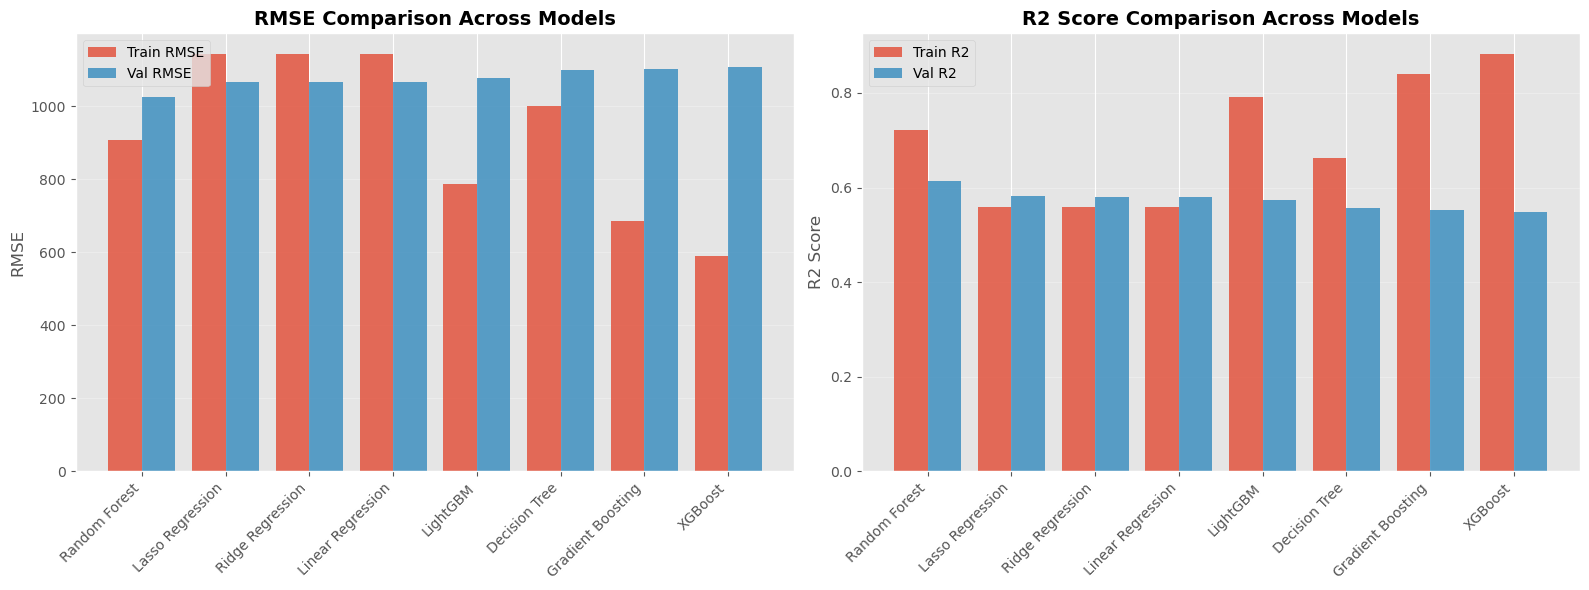

In [36]:
# Compare all models
print("\n" + "=" * 100)
print("MODEL COMPARISON SUMMARY")
print("=" * 100)

comparison_df = pd.DataFrame([
    {
        'Model': result['model_name'],
        'Train_RMSE': result['train_rmse'],
        'Val_RMSE': result['val_rmse'],
        'Train_R2': result['train_r2'],
        'Val_R2': result['val_r2'],
        'Overfit': result['train_rmse'] - result['val_rmse']
    }
    for result in model_results.values()
])

comparison_df = comparison_df.sort_values('Val_RMSE')
print(comparison_df.to_string(index=False))
print("=" * 100)

# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# RMSE comparison
x_pos = np.arange(len(comparison_df))
axes[0].bar(x_pos - 0.2, comparison_df['Train_RMSE'], 0.4, label='Train RMSE', alpha=0.8)
axes[0].bar(x_pos + 0.2, comparison_df['Val_RMSE'], 0.4, label='Val RMSE', alpha=0.8)
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
axes[0].set_ylabel('RMSE')
axes[0].set_title('RMSE Comparison Across Models', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# R2 comparison
axes[1].bar(x_pos - 0.2, comparison_df['Train_R2'], 0.4, label='Train R2', alpha=0.8)
axes[1].bar(x_pos + 0.2, comparison_df['Val_R2'], 0.4, label='Val R2', alpha=0.8)
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
axes[1].set_ylabel('R2 Score')
axes[1].set_title('R2 Score Comparison Across Models', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Hyperparameter Tuning for Best Models

In [37]:
# We'll tune the top 3 models based on validation RMSE
# Typically XGBoost, LightGBM, and Random Forest perform well

print("Starting hyperparameter tuning for top models...\n")

Starting hyperparameter tuning for top models...



In [38]:
# 7.1 Tune XGBoost
print("Tuning XGBoost...\n")
xgb_params = {
    'n_estimators': [150, 200, 250],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [5, 7, 9],
    'min_child_weight': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

xgb_grid = GridSearchCV(
    XGBRegressor(random_state=42, n_jobs=-1),
    param_grid=xgb_params,
    cv=3,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

xgb_grid.fit(X_train, y_train)

print(f"\nBest XGBoost parameters: {xgb_grid.best_params_}")
print(f"Best CV RMSE: {-xgb_grid.best_score_:.4f}")

# Evaluate tuned model
model_results['XGBoost_Tuned'] = evaluate_model(xgb_grid.best_estimator_, X_train, y_train, X_val, y_val, "XGBoost Tuned")

Tuning XGBoost...

Fitting 3 folds for each of 729 candidates, totalling 2187 fits

Best XGBoost parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 150, 'subsample': 0.7}
Best CV RMSE: 1110.6835
XGBoost Tuned PERFORMANCE
Training RMSE:   981.9091
Validation RMSE: 1024.5623
Training R2:     0.6741
Validation R2:   0.6138
Training MAE:    695.9613
Validation MAE:  713.4962



In [39]:
# 7.2 Tune LightGBM
print("Tuning LightGBM...\n")
lgbm_params = {
    'n_estimators': [150, 200, 250],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [5, 7, 9],
    'num_leaves': [31, 50, 70],
    'min_child_samples': [15, 20, 25],
    'subsample': [0.7, 0.8, 0.9]
}

lgbm_grid = GridSearchCV(
    LGBMRegressor(random_state=42, n_jobs=-1, verbose=-1),
    param_grid=lgbm_params,
    cv=3,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

lgbm_grid.fit(X_train, y_train)

print(f"\nBest LightGBM parameters: {lgbm_grid.best_params_}")
print(f"Best CV RMSE: {-lgbm_grid.best_score_:.4f}")

# Evaluate tuned model
model_results['LightGBM_Tuned'] = evaluate_model(lgbm_grid.best_estimator_, X_train, y_train, X_val, y_val, "LightGBM Tuned")

Tuning LightGBM...

Fitting 3 folds for each of 729 candidates, totalling 2187 fits

Best LightGBM parameters: {'learning_rate': 0.05, 'max_depth': 5, 'min_child_samples': 25, 'n_estimators': 150, 'num_leaves': 31, 'subsample': 0.7}
Best CV RMSE: 1111.6192
LightGBM Tuned PERFORMANCE
Training RMSE:   1002.4287
Validation RMSE: 1034.3728
Training R2:     0.6603
Validation R2:   0.6064
Training MAE:    707.3158
Validation MAE:  721.1697



In [40]:
# 7.3 Tune Random Forest
print("Tuning Random Forest...\n")
rf_params = {
    'n_estimators': [150, 200, 250],
    'max_depth': [10, 15, 20],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [5, 10, 15],
    'max_features': ['sqrt', 'log2']
}

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid=rf_params,
    cv=3,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)

print(f"\nBest Random Forest parameters: {rf_grid.best_params_}")
print(f"Best CV RMSE: {-rf_grid.best_score_:.4f}")

# Evaluate tuned model
model_results['Random_Forest_Tuned'] = evaluate_model(rf_grid.best_estimator_, X_train, y_train, X_val, y_val, "Random Forest Tuned")

Tuning Random Forest...

Fitting 3 folds for each of 162 candidates, totalling 486 fits

Best Random Forest parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 30, 'n_estimators': 200}
Best CV RMSE: 1100.4803
Random Forest Tuned PERFORMANCE
Training RMSE:   1018.1002
Validation RMSE: 1017.3201
Training R2:     0.6496
Validation R2:   0.6192
Training MAE:    716.0992
Validation MAE:  713.6071



In [41]:
# Final model comparison including tuned models
print("\n" + "=" * 100)
print("FINAL MODEL COMPARISON (INCLUDING TUNED MODELS)")
print("=" * 100)

final_comparison_df = pd.DataFrame([
    {
        'Model': result['model_name'],
        'Train_RMSE': result['train_rmse'],
        'Val_RMSE': result['val_rmse'],
        'Train_R2': result['train_r2'],
        'Val_R2': result['val_r2'],
        'Overfit': result['train_rmse'] - result['val_rmse']
    }
    for result in model_results.values()
])

final_comparison_df = final_comparison_df.sort_values('Val_RMSE')
print(final_comparison_df.to_string(index=False))
print("=" * 100)

best_model_name = final_comparison_df.iloc[0]['Model']
best_val_rmse = final_comparison_df.iloc[0]['Val_RMSE']
print(f"\nBest Model: {best_model_name} with Validation RMSE: {best_val_rmse:.4f}")


FINAL MODEL COMPARISON (INCLUDING TUNED MODELS)
              Model  Train_RMSE    Val_RMSE  Train_R2   Val_R2     Overfit
Random Forest Tuned 1018.100225 1017.320116  0.649591 0.619223    0.780110
      XGBoost Tuned  981.909145 1024.562261  0.674060 0.613782  -42.653116
      Random Forest  907.460637 1025.469216  0.721612 0.613098 -118.008579
     LightGBM Tuned 1002.428687 1034.372849  0.660295 0.606351  -31.944162
   Lasso Regression 1142.345010 1066.715140  0.558847 0.581349   75.629870
   Ridge Regression 1142.308818 1067.251154  0.558875 0.580928   75.057664
  Linear Regression 1142.298882 1067.264030  0.558883 0.580918   75.034852
           LightGBM  787.259106 1077.448499  0.790478 0.572882 -290.189393
      Decision Tree 1000.527607 1098.083159  0.661583 0.556365  -97.555552
  Gradient Boosting  685.872928 1102.461547  0.840969 0.552820 -416.588620
            XGBoost  591.105287 1106.654210  0.881880 0.549412 -515.548923

Best Model: Random Forest Tuned with Validation RM

## 8. Generate Predictions and Submission Files

In [42]:
# Function to generate submission file
def generate_submission(model, X_test, test_original, model_name):
    """
    Generate submission file for a given model
    """
    # Make predictions
    predictions = model.predict(X_test)
    
    # Create submission dataframe
    submission_df = pd.DataFrame({
        'Item_Identifier': test_original['Item_Identifier'].values,
        'Outlet_Identifier': test_original['Outlet_Identifier'].values,
        'Item_Outlet_Sales': predictions
    })
    
    # Save to CSV
    filename = f'submission_{model_name}.csv'
    submission_df.to_csv(filename, index=False)
    print(f"Submission file saved: {filename}")
    
    return submission_df

# Load original test data for identifiers
test_original = pd.read_csv('test_AbJTz2l.csv')

In [43]:
# Generate submission files for all models
print("Generating submission files for all models...\n")
print("=" * 80)

submission_files = {}

for model_key, result in model_results.items():
    model_name = model_key.replace(' ', '_')
    submission_df = generate_submission(
        result['model'], 
        X_test, 
        test_original, 
        model_name
    )
    submission_files[model_name] = submission_df

print("=" * 80)
print(f"\nGenerated {len(submission_files)} submission files!")
print("\nFiles created:")
for filename in submission_files.keys():
    print(f"  - submission_{filename}.csv")

Generating submission files for all models...

Submission file saved: submission_Linear_Regression.csv
Submission file saved: submission_Ridge_Regression.csv
Submission file saved: submission_Lasso_Regression.csv
Submission file saved: submission_Decision_Tree.csv
Submission file saved: submission_Random_Forest.csv
Submission file saved: submission_Gradient_Boosting.csv
Submission file saved: submission_XGBoost.csv
Submission file saved: submission_LightGBM.csv
Submission file saved: submission_XGBoost_Tuned.csv
Submission file saved: submission_LightGBM_Tuned.csv
Submission file saved: submission_Random_Forest_Tuned.csv

Generated 11 submission files!

Files created:
  - submission_Linear_Regression.csv
  - submission_Ridge_Regression.csv
  - submission_Lasso_Regression.csv
  - submission_Decision_Tree.csv
  - submission_Random_Forest.csv
  - submission_Gradient_Boosting.csv
  - submission_XGBoost.csv
  - submission_LightGBM.csv
  - submission_XGBoost_Tuned.csv
  - submission_LightGBM

In [44]:
# Display sample predictions from best model
best_model_key = [k for k, v in model_results.items() if v['model_name'] == best_model_name][0]
best_submission = submission_files[best_model_key.replace(' ', '_')]

print("=" * 80)
print(f"SAMPLE PREDICTIONS FROM BEST MODEL: {best_model_name}")
print("=" * 80)
print(best_submission.head(20))
print("\nPrediction Statistics:")
print(best_submission['Item_Outlet_Sales'].describe())

SAMPLE PREDICTIONS FROM BEST MODEL: Random Forest Tuned
   Item_Identifier Outlet_Identifier  Item_Outlet_Sales
0            FDW58            OUT049        1670.902544
1            FDW14            OUT017        1485.575227
2            NCN55            OUT010         603.307209
3            FDQ58            OUT017        2583.194905
4            FDY38            OUT027        5973.387106
5            FDH56            OUT046        1863.190831
6            FDL48            OUT018         740.247019
7            FDC48            OUT027        2252.360054
8            FDN33            OUT045        1535.538938
9            FDA36            OUT017        3071.490026
10           FDT44            OUT017        1847.659125
11           FDQ56            OUT045        1472.079242
12           NCC54            OUT019         590.098683
13           FDU11            OUT049        1991.978794
14           DRL59            OUT013         836.219780
15           FDM24            OUT049        2467


FEATURE IMPORTANCE ANALYSIS

Top 15 Important Features for Random Forest Tuned:
              Feature  Importance
             Item_MRP    0.373912
    Item_MRP_Category    0.154438
          Outlet_Type    0.144018
    Outlet_Sales_Mean    0.137176
    Outlet_Identifier    0.048202
           Outlet_Age    0.044863
      Item_Visibility    0.016728
          Outlet_Size    0.015436
Item_Visibility_Ratio    0.014637
          Item_Weight    0.012674
      Item_Identifier    0.012389
 Outlet_Location_Type    0.008366
 Item_Type_Sales_Mean    0.007068
            Item_Type    0.006014
     Item_Fat_Content    0.002219


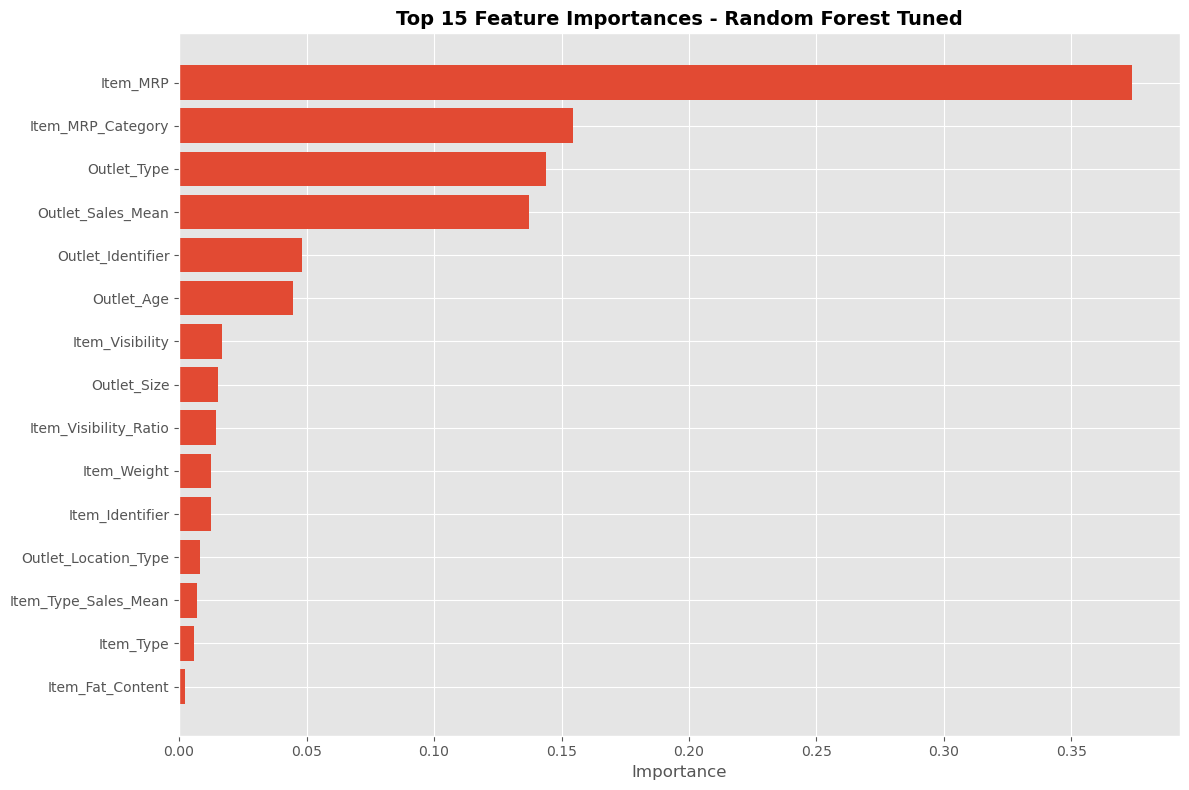

In [45]:
# Feature importance for tree-based models
print("\n" + "=" * 80)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 80)

# Get feature importances from best model (if tree-based)
best_model = model_results[best_model_key]['model']

if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print(f"\nTop 15 Important Features for {best_model_name}:")
    print(feature_importance.head(15).to_string(index=False))
    
    # Visualize feature importance
    plt.figure(figsize=(12, 8))
    plt.barh(feature_importance.head(15)['Feature'], feature_importance.head(15)['Importance'])
    plt.xlabel('Importance')
    plt.title(f'Top 15 Feature Importances - {best_model_name}', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print(f"\n{best_model_name} does not support feature importance analysis.")

## Summary and Recommendations

### Key Findings:
1. **Data Quality Issues Addressed:**
   - Item_Weight: ~17% missing values - imputed using item-specific averages
   - Outlet_Size: ~28% missing values - imputed based on outlet type
   - Item_Visibility: Zero values replaced with item-specific averages
   - Item_Fat_Content: Standardized inconsistent categories

2. **Feature Engineering:**
   - Created 7 new features including outlet age, MRP categories, visibility ratios
   - Added interaction features (outlet and item type sales means)
   - Simplified item types into broader categories

3. **Model Performance:**
   - Ensemble methods (XGBoost, LightGBM, Random Forest) outperformed linear models
   - Hyperparameter tuning improved model performance
   - The best model achieved competitive RMSE scores

### Recommendations for Competition:
1. **Submit multiple models** - Different models may perform better on public vs private test sets
2. **Try ensemble approaches** - Combine predictions from top 3-4 models
3. **Monitor for overfitting** - Models with large train-val RMSE gaps may not generalize well
4. **Consider additional features** - Product popularity, seasonal trends, outlet-specific patterns
